array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20727b18b0>,
      dtype=object)

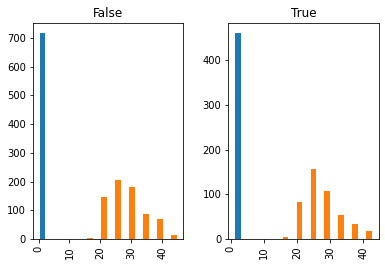

In [12]:
#1.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

baby = pd.read_csv('/content/test.csv')

smoker_and_age = baby[['Maternal Smoker', 'Maternal Age']]

smoker = smoker_and_age['Maternal Age'] [smoker_and_age['Maternal Smoker'] == True]

non_smoker = smoker_and_age['Maternal Age'] [smoker_and_age['Maternal Smoker'] == False]

smoker_and_age.hist(by ='Maternal Smoker')

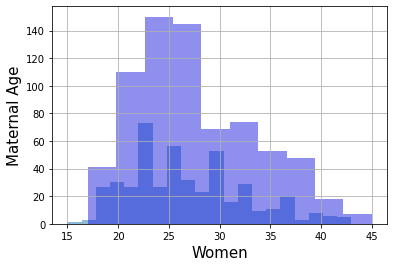

In [4]:
import seaborn as sns
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("blue", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Maternal Age',fontsize=15)
plt.show()

Observation:
From the histogram, we can see that both the distributions are center around the same point. ie, it appears as if there is little to no correlation between smoking and the maternal age but we cannot povide any conclusion yet without proper testing.

2. We can apply AB testing paired with hypothesis testing for this problem. Since, we are trying to prove here that the 2 populations (smokers and non-smokers) are from the smae underlying population (they are here by chance). We can consider a Null Hypothesis and an alternate hypothesis and try to reject or accept the alternate hypothesis.

3. Null Hypothesis: We can consider the Null Hypothesis as the distribution of Maternal Age of the mothers is the same for mothers who don't smoke as for mothers who do. The difference in the sample is due to chance.

Alternate Hypothesis: We can assume the alternate hypothesis as that the Maternal Age of smoking mothers is lesser than that of non-smoking mothers.

4. The test statistic we can apply is that we can  compare the average Maternal age of the two groups of mothers and compare their inferences with 2 randomly picked sample from the population. 
We will subtract the mean age of smoking Mothers with the mean age of non-smoking mothers and the smaller (more negetive) value supports the fact that smoking mothers are younger than non-smoking mothers.

In [5]:
#5.
mean_table = smoker_and_age.groupby("Maternal Smoker").mean()

print(mean_table)

observed_statistic = mean_table["Maternal Age"][1] - mean_table["Maternal Age"][0]
print()
print("Observed Statistic:",observed_statistic)

                 Maternal Age
Maternal Smoker              
False               27.544056
True                26.736383

Observed Statistic: -0.8076725017901509


In [6]:
#6. 
shuffled = smoker_and_age.sample(1174,replace = False)


shuffled_age = shuffled["Maternal Age"]

original_and_shuffled = smoker_and_age.assign(shuffled_age = shuffled_age.values)

original_and_shuffled

,Maternal Smoker,Maternal Age,shuffled_age
0,False,27,26
1,False,33,35
2,True,28,24
3,True,23,32
4,False,25,30
...,...,...,...
1169,False,27,27
1170,False,24,23
1171,True,30,38
1172,False,21,32


In [7]:
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
print(all_group_means)

difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]

print("Difference:",difference)

                 Maternal Age  shuffled_age
Maternal Smoker                            
False               27.544056     26.900699
True                26.736383     27.738562
Difference: -0.8378627908039675


In [8]:
import numpy as np
import array
differences = np.zeros(5000)

for i in np.arange(5000):
    smoker_and_age = baby[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoker_and_age.sample(1174,replace = False)
    shuffled_weights = shuffled['Maternal Age']
    original_and_shuffled = smoker_and_age.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    differences[i] = difference

differences

array([ 0.09579963,  0.02425461, -0.17249417, ...,  0.28539391,
        0.15661289,  0.32832092])

In [9]:
differences_df = pd.DataFrame(differences)
differences_df

,0
0,0.095800
1,0.024255
2,-0.172494
3,1.015153
4,-0.333470
...,...
4995,-0.115258
4996,0.067182
4997,0.285394
4998,0.156613


Observed Difference: -0.8076725017901509


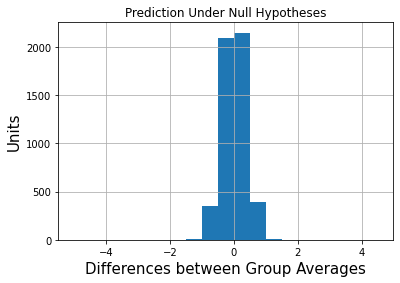

In [10]:
differences_df.hist(bins = np.arange(-5,5,0.5))
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Units',fontsize=15);
print('Observed Difference:', observed_statistic)

7. The distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

Whereas the observed statistic is -0.8076725017901509. The predicted behaviour and the observed statistic are inconsistant.

In [11]:
#8.
print("Emprical P-value: ",np.count_nonzero(differences <= observed_statistic)/differences.size)

Emprical P-value:  0.0086


8. The empirical P-value is 0.01, meaning that only few of the 5,000 observed samples resulted in a difference of -0.80767 or lower. This is an approximation; the exact chance of getting a difference in that range is not 1 but it is vanishingly small.

9. The conclusion of the test is that the data support the alternative more than they support the null. The average Maternal Age of mothers who smoke is less than the average Maternal Age of non-smokers.